In [17]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd

import matplotlib.colors as mcolors

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import moabb.analysis.plotting as moabb_plt
from moabb.analysis.meta_analysis import (  # noqa: E501
    compute_dataset_statistics,
    find_significant_differences,
)
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from pathlib import Path

In [18]:
runs = Path.cwd() / Path("reports") / Path("runs")
YesEAYesFrozen = "yes_EA_yes_freeze-BNCI2014001-alignment-exp_hybrid-0-both"
YesEANoFrozen = "yes_EA_no_freeze-BNCI2014001-alignment-exp_hybrid-0-both"
NoEAYesFrozen = "no_EA_yes_freeze-BNCI2014001-no-alignment-exp_hybrid-0-both"
NoEANoFrozen = "no_EA_no_freeze-BNCI2014001-no-alignment-exp_hybrid-0-both"

resultsYesEAYesFrozen = pd.read_csv(runs / Path(YesEAYesFrozen) / Path(YesEAYesFrozen + "_results.csv"))
resultsYesEANoFrozen = pd.read_csv(runs / Path(YesEANoFrozen) / Path(YesEANoFrozen + "_results.csv"))
resultsNoEAYesFrozen = pd.read_csv(runs / Path(NoEAYesFrozen) / Path(NoEAYesFrozen + "_results.csv"))
resultsNoEANoFrozen = pd.read_csv(runs / Path(NoEANoFrozen) / Path(NoEANoFrozen + "_results.csv"))
resultsNoEANoFrozen

,Unnamed: 0,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0,0.830247,294.43225,2304.0,1,session_E,22,2,001-2014,EEGNetv4_Without_EA
1,1,0.510031,285.37708,2304.0,2,session_E,22,2,001-2014,EEGNetv4_Without_EA
2,2,0.982253,285.37122,2304.0,3,session_E,22,2,001-2014,EEGNetv4_Without_EA
3,3,0.842207,287.07742,2304.0,4,session_E,22,2,001-2014,EEGNetv4_Without_EA
4,4,0.516397,278.27625,2304.0,5,session_E,22,2,001-2014,EEGNetv4_Without_EA
5,5,0.689236,280.65680,2304.0,6,session_E,22,2,001-2014,EEGNetv4_Without_EA
6,6,0.592978,276.92554,2304.0,7,session_E,22,2,001-2014,EEGNetv4_Without_EA
7,7,0.978781,280.33823,2304.0,8,session_E,22,2,001-2014,EEGNetv4_Without_EA
8,8,0.960262,275.92432,2304.0,9,session_E,22,2,001-2014,EEGNetv4_Without_EA


In [3]:
results = pd.concat([resultsYesEAYesFrozen,resultsYesEANoFrozen,resultsNoEAYesFrozen,resultsNoEANoFrozen])

In [4]:
results.loc[results['pipeline'] == 'EEGNetv4_EA', 'pipeline'] ='aligned'
results.loc[results['pipeline'] == 'EEGNetv4_Without_EA', 'pipeline'] ='non-aligned'

In [5]:
results

,Unnamed: 0,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0,0.886767,387.60822,2304.0,1,session_E,22,2,001-2014,aligned
1,1,0.661844,359.97134,2304.0,2,session_E,22,2,001-2014,aligned
2,2,0.823688,318.69580,2304.0,3,session_E,22,2,001-2014,aligned
3,3,0.842400,322.16446,2304.0,4,session_E,22,2,001-2014,aligned
4,4,0.658951,275.86557,2304.0,5,session_E,22,2,001-2014,aligned
5,5,0.639468,314.62585,2304.0,6,session_E,22,2,001-2014,aligned
6,6,0.636960,259.93990,2304.0,7,session_E,22,2,001-2014,aligned
7,7,0.986497,261.73734,2304.0,8,session_E,22,2,001-2014,aligned
8,8,0.929205,199.37048,2304.0,9,session_E,22,2,001-2014,aligned
0,0,0.974537,283.53198,2304.0,1,session_E,22,2,001-2014,aligned


In [ ]:
def boxplot_exps(results):

    fig, ax = plt.subplots()

    sns.set_context('paper')

    sns.set_style("ticks")

    #plt.title(f"Score of each test individual in the shared model",fontsize=15)

    ax = sns.boxplot(data=results, y="score", x="exp",
                    hue="pipeline", ax=ax, palette='Greens')

    ax = sns.stripplot(data=results, y="score", x="exp",
                    hue="pipeline", ax=ax, dodge=True,
                    linewidth=1, alpha=.5, legend = False, palette='Greens')

    #sns.despine(right = True)

    plt.legend()

    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    ax.set_ylabel("Score",fontsize=14.5)
    ax.set_xlabel("Experiments",fontsize=14.5)

    fig.savefig("boxplot_exp.pdf", format='pdf', dpi=300, bbox_inches='tight')
    plt.show()


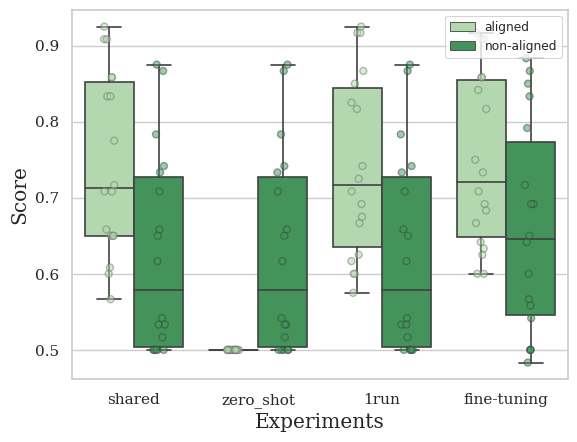

In [ ]:
boxplot_exps(results)

In [ ]:
def barplot_subjs(results):

    sns.set_context('paper')

    sns.set_style("ticks")

    cmap = sns.color_palette("BuGn", 12)

    fig, ax = plt.subplots(figsize=(15,5))
    #plt.title(f"Score of each test individual in the shared model",fontsize=15)

    ax = sns.barplot(data=results, y="score", x="subject",
                    hue="exp", ax=ax, palette=cmap[4:]) #

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    ax.set_ylabel("Score",fontsize=14.5)
    ax.set_xlabel("Subjects",fontsize=14.5)

    fig.savefig("barplot_subjs.pdf", format='pdf', dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
# For each subj
results["exp"] = results['exp'].astype(str) +"-"+ results["pipeline"]

In [ ]:
results

,Unnamed: 0,time,dataset,subject,session,score,type,ft,n_samples,n_channels,pipeline,exp
0,0,311.995856,001-2014,1,session_E,0.861111,Offline,Without,2304,22,aligned,shared-aligned
1,1,311.995856,001-2014,1,session_E,0.500000,Online,Without,2304,22,aligned,zero_shot-aligned
2,2,311.995856,001-2014,1,session_E,0.798611,Online,Without,2304,22,aligned,1run-aligned
3,3,311.995856,001-2014,1,session_T,0.833333,Offline,Without,2304,22,aligned,shared-aligned
4,4,311.995856,001-2014,1,session_T,0.500000,Online,Without,2304,22,aligned,zero_shot-aligned
...,...,...,...,...,...,...,...,...,...,...,...,...
67,13,33.707283,001-2014,7,session_T,0.575000,Online,With,2328,22,non-aligned,fine-tuning-non-aligned
68,14,45.728790,001-2014,8,session_E,0.923611,Online,With,2328,22,non-aligned,fine-tuning-non-aligned
69,15,38.883558,001-2014,8,session_T,0.866667,Online,With,2328,22,non-aligned,fine-tuning-non-aligned
70,16,51.373377,001-2014,9,session_E,0.652778,Online,With,2328,22,non-aligned,fine-tuning-non-aligned


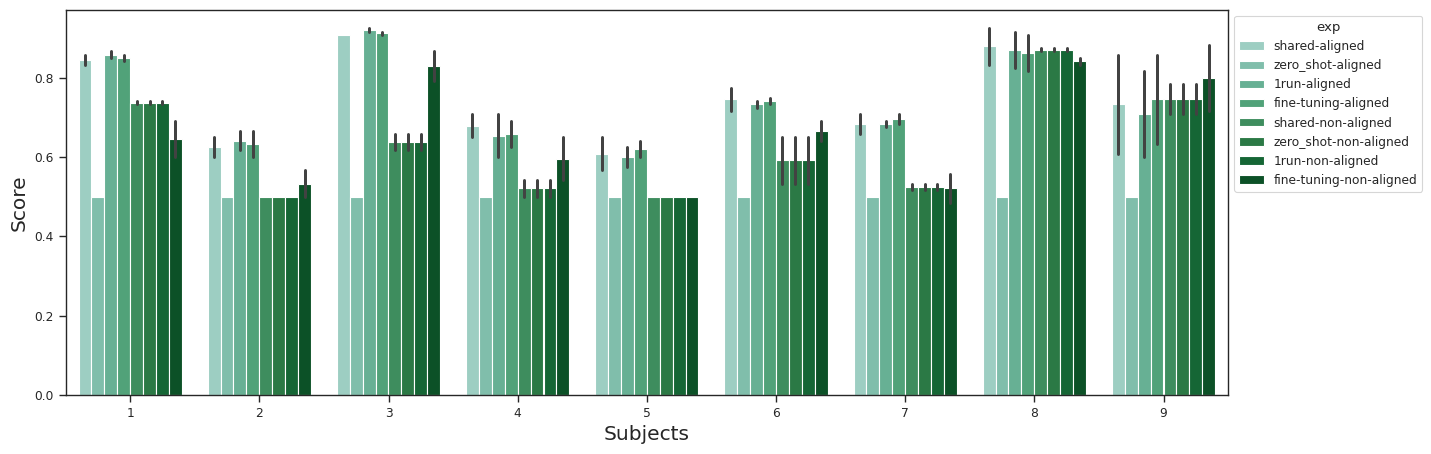

In [ ]:
barplot_subjs(results)